<a href="https://colab.research.google.com/github/Amitparikh1/CADS_DataScienceWorkshop/blob/main/Intro_To_DataScience_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the data 

In [26]:
## Read from a csv
url="https://raw.githubusercontent.com/Amitparikh1/CADS_DataScienceWorkshop/main/most-recent-field-data-elements.csv"
all_data = pd.read_csv(url)

## "head()" Command to look at the first 5 rows of data
all_data.head()

## Selecting Columns
#example = all_data['INSTNM']
## Selecting Rows by the Index
#example = all_data.loc[5]
## Selecting Rows by a value in a column
#example = all_data.loc[all_data['CONTROL']=='Public']


#print(example)

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


Clean the Data

In [37]:
## Select the columns that we want 
df = all_data[['CIPDESC','CREDDESC','MD_EARN_WNE']]

## Select rows that are about Bachelors Degrees
df = df.loc[df['CREDDESC']=="Bachelors Degree"]

## Select rows that have values for the median earnings
df = df.loc[df['MD_EARN_WNE']!= "PrivacySuppressed"]


## Convert Median Earnings Column to a numeric value from string
df['MD_EARN_WNE'] = df['MD_EARN_WNE'].astype(int)
## Combine rows by their field of study and average their median earnings 
df = df.groupby(df['CIPDESC'],as_index=False).mean()
## Sort by highest to lowest paying 
df = df.sort_values(by='MD_EARN_WNE',ascending=False)

df = df.reset_index(drop=True)
df.head()
## Finding certain values
print(df.loc[df['CIPDESC']=='Computer Science.'])
print(df.loc[df['CIPDESC']=='Statistics.'])


Empty DataFrame
Columns: [CIPDESC, MD_EARN_WNE]
Index: []
              CIPDESC   MD_EARN_WNE
12  Computer Science.  66347.727273
        CIPDESC   MD_EARN_WNE
46  Statistics.  55352.173913


Plotting the Data

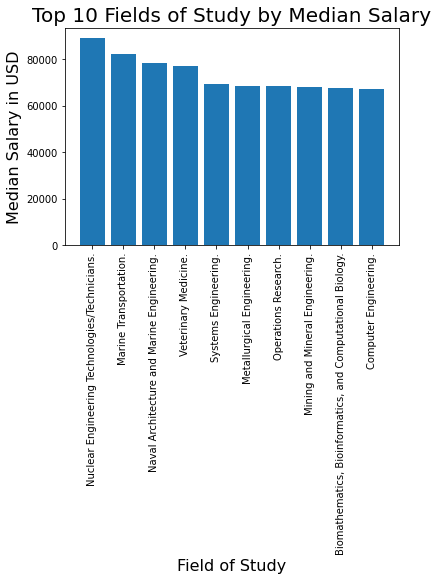

In [30]:
###  Bar Chart of the top 10 median salaries by Field of Study
## Get the top 10 rows
top_ten = df.iloc[0:10]

## Bar chart 
plt.bar(x=top_ten['CIPDESC'],height=top_ten['MD_EARN_WNE'])

# Format the x ticks
plt.xticks(rotation=90)

# Add labels to the axes
plt.xlabel("Field of Study",fontsize=16)
plt.ylabel("Median Salary in USD",fontsize=16)

# Add a title
plt.title("Top 10 Fields of Study by Median Salary",fontsize=20)

plt.show()


Other Things to Try:

In [ ]:
## Compare earnings and debt by degree level. Are the higher starting salaries from Bachelor's degrees worth the higher debt compared to Associate's degrees
## Using the count column, find the most popular fields of study. Do these align with high paying fields?
## Create a column to calculate the Median Earnings to Median Debt Ratio. Is this higher for public or private schools? 
## Explore the data, try new things, look at the Pandas and Matplotlib documentation pages for ideas